In [367]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [368]:

# Costs and utility ratios
costs_with_ASP = np.array([666, 666, 666, 746, 1362, 2088, 2088, 2088, 2338, 4270, 0, 0])
costs_without_ASP = np.array([3236, 3236, 3236, 3625, 6619, 10144, 10144, 10144, 11361, 20747, 0, 0])

# Initial population
initial_population = np.array([1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])  # Initial state

# Parameters for PSA
num_iterations = 1000  # Number of PSA samples
std_dev_transition = 0.01  # Standard deviation for transition probabilities
std_dev_costs = 0.05 # 10% of cost as std dev




In [369]:
transition_matrix_without_ASP = np.array([
    [0.0000, 0.8493, 0.0000, 0.0000, 0.0000, 0.0000, 0.0048, 0.0000, 0.0000, 0.0000, 0.1379, 0.0080],
    [0.0000, 0.0000, 0.8224, 0.0000, 0.0000, 0.0000, 0.0000, 0.0058, 0.0000, 0.0000, 0.1622, 0.0096],
    [0.0000, 0.0000, 0.7834, 0.0019, 0.0029, 0.0000, 0.0000, 0.0071, 0.0000, 0.0000, 0.1929, 0.0118],
    [0.0000, 0.0000, 0.0000, 0.9029, 0.0000, 0.0000, 0.0000, 0.0000, 0.0046, 0.0000, 0.0697, 0.0228],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.9530, 0.0000, 0.0000, 0.0000, 0.0000, 0.0022, 0.0295, 0.0153],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8562, 0.0000, 0.0000, 0.0000, 0.1226, 0.0212],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8321, 0.0000, 0.0000, 0.1430, 0.0249],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7918, 0.0215, 0.0333, 0.1307, 0.0227],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8626, 0.0000, 0.0894, 0.0480],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9540, 0.0257, 0.0203],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
])

transition_matrix_with_ASP = np.array([
    [0.0000, 0.8306, 0.0000, 0.0000, 0.0000, 0.0000, 0.0055, 0.0000, 0.0000, 0.0000, 0.1548, 0.0091],
    [0.0000, 0.0000, 0.7700, 0.0000, 0.0000, 0.0000, 0.0000, 0.0100, 0.0000, 0.0000, 0.2100, 0.0100],
    [0.0000, 0.0000, 0.7432, 0.0016, 0.0024, 0.0000, 0.0000, 0.0087, 0.0000, 0.0000, 0.2297, 0.0144],
    [0.0000, 0.0000, 0.0000, 0.9029, 0.0000, 0.0000, 0.0000, 0.0000, 0.0046, 0.0000, 0.0697, 0.0228],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.9530, 0.0000, 0.0000, 0.0000, 0.0000, 0.0022, 0.0295, 0.0153],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8562, 0.0000, 0.0000, 0.0000, 0.1226, 0.0212],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8321, 0.0000, 0.0000, 0.1430, 0.0249],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7933, 0.0151, 0.0234, 0.1432, 0.0250],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.8626, 0.0000, 0.0894, 0.0480],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9540, 0.0257, 0.0203],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000],
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
])

In [370]:
# Define distributions for PSA
def sample_transition_matrix(base_matrix, std_dev, num_samples):
    """
    Generate samples of transition probabilities using a Dirichlet distribution
    with 5% variability.

    Parameters:
        base_matrix (np.ndarray): The base transition matrix.
        std_dev (float): Standard deviation for transition probabilities (5% default).
        num_samples (int): Number of samples to generate.

    Returns:
        list of np.ndarray: A list of sampled transition matrices.
    """
    num_states = base_matrix.shape[0]
    samples = []

    for _ in range(num_samples):
        sampled_matrix = np.zeros_like(base_matrix, dtype=float)  # Initialize with zeros

        for i, row in enumerate(base_matrix):
            # Identify indices of elements that are > 0
            modifiable_indices = np.where(row > 0)[0]

            if len(modifiable_indices) > 0:  # If there are modifiable elements
                # Inflate the row values slightly to add variability
                dirichlet_params = row[modifiable_indices] * (1 / std_dev)
                sampled_probs = np.random.dirichlet(dirichlet_params)

                # Assign the sampled probabilities back to the corresponding indices
                sampled_matrix[i, modifiable_indices] = sampled_probs

        # Ensure each row sums to 1 (in case of minor floating-point inaccuracies)
        sampled_matrix = sampled_matrix / sampled_matrix.sum(axis=1, keepdims=True)

        samples.append(sampled_matrix)

    return samples

In [371]:
def sample_parameters(base_values, std_dev, dist):
    """
    Generate samples for parameters (e.g., costs, utilities) from specified distributions.
    """
    if dist == "gamma":
        epsilon = 1e-6  # Small value to avoid division by zero
        shape = (base_values / (std_dev + epsilon)) ** 2
        scale = std_dev ** 2 / (base_values + epsilon)  # Add epsilon to the denominator
        #print("shape:",shape, "scale:",scale)
        return np.random.gamma(shape, scale)
    elif dist == "beta":
        # Filter out 0 and 1 from base_values
        valid_indices = np.where((base_values > 0) & (base_values < 1))

        # Calculate alpha and beta only for valid values
        alpha = base_values[valid_indices] * (1 - base_values[valid_indices]) / std_dev**2 - base_values[valid_indices]
        beta = alpha * (1 - base_values[valid_indices]) / base_values[valid_indices]

        # Sample from beta distribution
        samples = np.random.beta(alpha, beta)

        # Create an array with the same shape as base_values and fill with samples
        result = np.zeros_like(base_values, dtype=float)
        result[valid_indices] = samples

        #print("base:",base_values[valid_indices])
        #print("samples:",samples)

        # Keep original values for 0 and 1
        result[base_values == 0] = 0
        result[base_values == 1] = 1

        #print("result:",result)

        return result
    else:
        raise ValueError("Unsupported distribution.")


In [372]:
# Verify Transition Matrices
def verify_transition_matrix(matrix):
    """
    Verifies that each row of the matrix sums to 1 (within tolerance)
    and contains no negative values.
    """
    row_sums = matrix.sum(axis=1)
    if not np.allclose(row_sums, 1, atol=1e-6):
        raise ValueError("Rows of the transition matrix do not sum to 1.")
    if not np.all(matrix >= 0):
        raise ValueError("Transition matrix contains negative probabilities.")


In [373]:
# Add Convergence Check to Markov Simulation
def run_markov_with_dalys(transition_matrix, costs, population):
    max_cycles=1000
    tolerance=1e-6
    total_cost = 0
    ward_days = 0
    icu_days = 0
    cycles = 0

    verify_transition_matrix(transition_matrix)
    #print("\nTRM\n",transition_matrix,"\nCost\n", costs,"\nUtil\n", utilities,"\npop\n", population)

    while population[:-2].sum() >= 1 and cycles < max_cycles:  # Stop when non-terminal states are < 1
        # Calculate costs, utilities, and DALYs for the current cycle
        total_cost += np.dot(population, costs)
        ward_days = ward_days + population[0] + population[1] + population[2] + population[3] + population[4] 
        icu_days = icu_days + population[5] + population[6] + population[7] + population[8] + population[9] 
        hospital_days = ward_days + icu_days
        # Update population
        new_population = np.dot(population, transition_matrix)

        # Check for convergence
        if np.all(np.abs(new_population - population) < tolerance):
            break

        population = new_population
        cycles += 1
    
    #print(total_dalys_lost, cycles)

    #return total_cost, total_utility, total_dalys_lost, cycles
    return total_cost, ward_days, icu_days, hospital_days, cycles, population[11], population[10]


In [374]:
# Save PSA Results to CSV
def save_results_to_csv(results, filename="psa_results.csv"):
    """
    Saves the PSA results to a CSV file.
    """
    df = pd.DataFrame(results)
    df.to_csv(filename, index=False)
    print(f"PSA results saved to {filename}")


In [375]:
# Visualize PSA Results
def visualize_psa_results(icers_utility, icers_dalys):
    """
    Plots histograms of ICER distributions for utility and DALYs.
    """
    plt.figure(figsize=(12, 6))

    # ICER based on Utility
    plt.subplot(1, 2, 1)
    plt.hist(icers_utility, bins=30, color="blue", alpha=0.7, label="ICER (Utility)")
    plt.axvline(np.mean(icers_utility), color="red", linestyle="--", label="Mean ICER")
    plt.title("ICER Distribution (Utility)")
    plt.xlabel("ICER ($/QALY)")
    plt.ylabel("Frequency")
    plt.legend()

    # ICER based on DALYs
    plt.subplot(1, 2, 2)
    plt.hist(icers_dalys, bins=30, color="green", alpha=0.7, label="ICER (DALYs)")
    plt.axvline(np.mean(icers_dalys), color="red", linestyle="--", label="Mean ICER")
    plt.title("ICER Distribution (DALYs)")
    plt.xlabel("ICER ($/DALY Saved)")
    plt.ylabel("Frequency")
    plt.legend()

    plt.tight_layout()
    plt.show()



In [388]:
def plot_cost_effectiveness_plane(incremental_costs, incremental_utilities, wtp_threshold, xAxesLabel):
    """
    Plot the Cost-Effectiveness Plane to visualize the relationship between
    incremental costs and utilities without including the WTP threshold.

    Args:
        incremental_costs (list): Incremental costs from PSA results.
        incremental_utilities (list): Incremental utilities from PSA results.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=incremental_utilities, y=incremental_costs, alpha=0.5, color="blue")
    plt.axhline(0, color="black", linestyle="--", label="No Cost Difference")
    plt.axvline(0, color="blue", linestyle="--", label="No Utility Difference")
    plt.title("Cost-Effectiveness Plane")
    plt.xlabel(xAxesLabel)
    plt.ylabel("Incremental Cost (₹)")
    plt.legend()
    plt.grid(True)

    '''
    # Set scalar formatter to avoid scientific notation
    formatter = ScalarFormatter(useOffset=False, useMathText=False)
    formatter.set_scientific(False)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().yaxis.set_major_formatter(formatter)
    '''

    # Alternatively, you can use ticklabel_format
    plt.ticklabel_format(style='plain', axis='both')

   # Extend y-axis equally above and below zero
    max_y = max(abs(min(incremental_costs)), abs(max(incremental_costs)))
    plt.ylim(-1.1*max_y, 1.1*max_y)

    # Extend x-axis equally above and below zero
    max_x = max(abs(min(incremental_utilities)), abs(max(incremental_utilities)))
    plt.xlim(-1.1*max_x, 1.1*max_x)
 
    # Plot WTP threshold line
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = wtp_threshold * x_vals
    plt.plot(x_vals, y_vals, '--', color='red', label=f'WTP Threshold = ₹{wtp_threshold}')
    plt.legend()

    # Count points in each quadrant
    q1 = sum((np.array(incremental_utilities) > 0) & (np.array(incremental_costs) > 0))
    q2 = sum((np.array(incremental_utilities) < 0) & (np.array(incremental_costs) > 0))
    q3 = sum((np.array(incremental_utilities) < 0) & (np.array(incremental_costs) < 0))
    q4 = sum((np.array(incremental_utilities) > 0) & (np.array(incremental_costs) < 0))

    # Count points above and below the WTP threshold line
    above_wtp = sum(np.array(incremental_costs) > wtp_threshold * np.array(incremental_utilities))
    below_wtp = sum(np.array(incremental_costs) <= wtp_threshold * np.array(incremental_utilities))

    # Annotate the plot with counts in the middle of each quadrant
    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
    plt.text(0.55*max_x, 0.55*max_y, f'Q1: {q1}', fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=bbox_props)
    plt.text(-0.55*max_x, 0.55*max_y, f'Q2: {q2}', fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=bbox_props)
    plt.text(-0.55*max_x, -0.55*max_y, f'Q3: {q3}', fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=bbox_props)
    plt.text(0.55*max_x, -0.55*max_y, f'Q4: {q4}', fontsize=12, verticalalignment='center', horizontalalignment='center', bbox=bbox_props)

    # Annotate the plot with counts above and below the WTP threshold line
    plt.text(0.95*max_x, 0.95*max_y, f'Above WTP: {above_wtp}', fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=bbox_props)
    plt.text(0.95*max_x, -0.95*max_y, f'Below WTP: {below_wtp}', fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=bbox_props)

    plt.show()


In [377]:
# Generate samples for PSA
samples_with_ASP = sample_transition_matrix(transition_matrix_with_ASP, std_dev=std_dev_transition, num_samples=num_iterations)
samples_without_ASP = sample_transition_matrix(transition_matrix_without_ASP, std_dev=std_dev_transition, num_samples=num_iterations)
cost_samples_with_ASP = [sample_parameters(costs_with_ASP, std_dev_costs, dist="gamma") for _ in range(num_iterations)]
cost_samples_without_ASP = [sample_parameters(costs_without_ASP, std_dev_costs, dist="gamma") for _ in range(num_iterations)]


# Run PSA Simulations
psa_results = []

for i in range(num_iterations):
    # Use the ith sample for transition matrices, costs, and utilities
    
    cost_with_ASP, ward_days_with_ASP, icu_days_with_ASP, hospital_days_with_ASP, cycles_with_ASP, deaths_with_ASP, survived_with_ASP = run_markov_with_dalys(
        samples_with_ASP[i], cost_samples_with_ASP[i], initial_population
    )
    cost_without_ASP, ward_days_without_ASP, icu_days_without_ASP, hospital_days_without_ASP, cycles_without_ASP, deaths_without_ASP, survived_without_ASP = run_markov_with_dalys(
        samples_without_ASP[i], cost_samples_without_ASP[i], initial_population
    )
    # Calculate incremental outcomes
    incremental_cost = cost_with_ASP - cost_without_ASP
    ward_days_saved = -(ward_days_with_ASP - ward_days_without_ASP)
    icu_days_saved = -(icu_days_with_ASP - icu_days_without_ASP)
    hospital_days_saved = -(hospital_days_with_ASP-hospital_days_without_ASP)
    deaths_averted = -(deaths_with_ASP - deaths_without_ASP)

    icer_ward_days = incremental_cost / ward_days_saved if ward_days_saved != 0 else float('inf')
    icer_icu_days = incremental_cost / icu_days_saved if icu_days_saved != 0 else float('inf')
    icer_hospital_days = incremental_cost / hospital_days_saved if hospital_days_saved != 0 else float('inf')
    icer_deaths = incremental_cost / deaths_averted if deaths_averted != 0 else float('inf')


    # Store results for this iteration
    psa_results.append({
        "Cost without ASP": cost_without_ASP,
        "Cost with ASP": cost_with_ASP,
        "Incremental Cost": incremental_cost,

        "Deaths averted": deaths_averted,
        "Ward Days Saved": ward_days_saved,
        "ICU Days Saved": icu_days_saved,
        "Hospital Days Saved": hospital_days_saved,
        
        "ICER (Deaths)": icer_deaths,
        "ICER (Ward Days)": icer_ward_days,
        "ICER (ICU Days)": icer_icu_days,
        "ICER (Hospital Days)": icer_hospital_days    
    })

# Summarize PSA Results
incremental_costs = [res["Incremental Cost"] for res in psa_results]
deaths_averted = [res["Deaths averted"] for res in psa_results]
ward_days_saved = [res["Ward Days Saved"] for res in psa_results]
icu_days_saved = [res["ICU Days Saved"] for res in psa_results]
hospital_days_saved = [res["Hospital Days Saved"] for res in psa_results]
icers_deaths = [res["ICER (Deaths)"] for res in psa_results]
icers_ward_days = [res["ICER (Ward Days)"] for res in psa_results]
icers_icu_days = [res["ICER (ICU Days)"] for res in psa_results]
icers_hospital_days = [res["ICER (Hospital Days)"] for res in psa_results]  


summary_psa = {
    "Incremental Cost (mean)": np.mean(incremental_costs),
    "Deaths averted (mean)": np.mean(deaths_averted),
    "Ward Days Saved (mean)": np.mean(ward_days_saved),
    "ICU Days Saved (mean)": np.mean(icu_days_saved),
    "Hospital Days Saved (mean)": np.mean(hospital_days_saved),
    "ICER (Deaths, mean)": np.mean(icers_deaths),
    "ICER (Ward Days, mean)": np.mean(icers_ward_days),
    "ICER (ICU Days, mean)": np.mean(icers_icu_days),
    "ICER (Hospital Days, mean)": np.mean(icers_hospital_days)
}




# Output Results
print(summary_psa)

# Save results to CSV
save_results_to_csv(psa_results)


{'Incremental Cost (mean)': np.float64(-19179538.63559718), 'Deaths averted (mean)': np.float64(1.4943903509960033), 'Ward Days Saved (mean)': np.float64(845.8968964696107), 'ICU Days Saved (mean)': np.float64(24.33598621177601), 'Hospital Days Saved (mean)': np.float64(870.2328826813866), 'ICER (Deaths, mean)': np.float64(-734047.8755869488), 'ICER (Ward Days, mean)': np.float64(-18914.43773467471), 'ICER (ICU Days, mean)': np.float64(72374.25345326439), 'ICER (Hospital Days, mean)': np.float64(-30230.74502856949)}
PSA results saved to psa_results.csv


In [378]:
all_samples_with_ASP = np.stack(samples_with_ASP)  # Stack samples into a single NumPy array
num_samples_with_ASP = all_samples_with_ASP.shape[0]
matrix_size_with_ASP = all_samples_with_ASP.shape[1] * all_samples_with_ASP.shape[2]
flattened_samples_with_ASP = all_samples_with_ASP.reshape(num_samples_with_ASP, matrix_size_with_ASP)
df_with_ASP = pd.DataFrame(flattened_samples_with_ASP)
df_with_ASP.to_csv("samples_with_ASP.csv", index=False)

# Save samples_without_ASP to CSV
all_samples_without_ASP = np.stack(samples_without_ASP)  # Stack samples into a single NumPy array
num_samples_without_ASP = all_samples_without_ASP.shape[0]
matrix_size_without_ASP = all_samples_without_ASP.shape[1] * all_samples_without_ASP.shape[2]
flattened_samples_without_ASP = all_samples_without_ASP.reshape(num_samples_without_ASP, matrix_size_without_ASP)
df_without_ASP = pd.DataFrame(flattened_samples_without_ASP)
df_without_ASP.to_csv("samples_without_ASP.csv", index=False)


# Save cost_samples_with_ASP to CSV with elements split into columns
cost_samples_with_ASP_df = pd.DataFrame(cost_samples_with_ASP)
cost_samples_with_ASP_df.to_csv("cost_samples_with_ASP.csv", index=False)

# Save cost_samples_without_ASP to CSV with elements split into columns
cost_samples_without_ASP_df = pd.DataFrame(cost_samples_without_ASP)
cost_samples_without_ASP_df.to_csv("cost_samples_without_ASP.csv", index=False)

print("All datasets have been saved to individual CSV files.")

All datasets have been saved to individual CSV files.


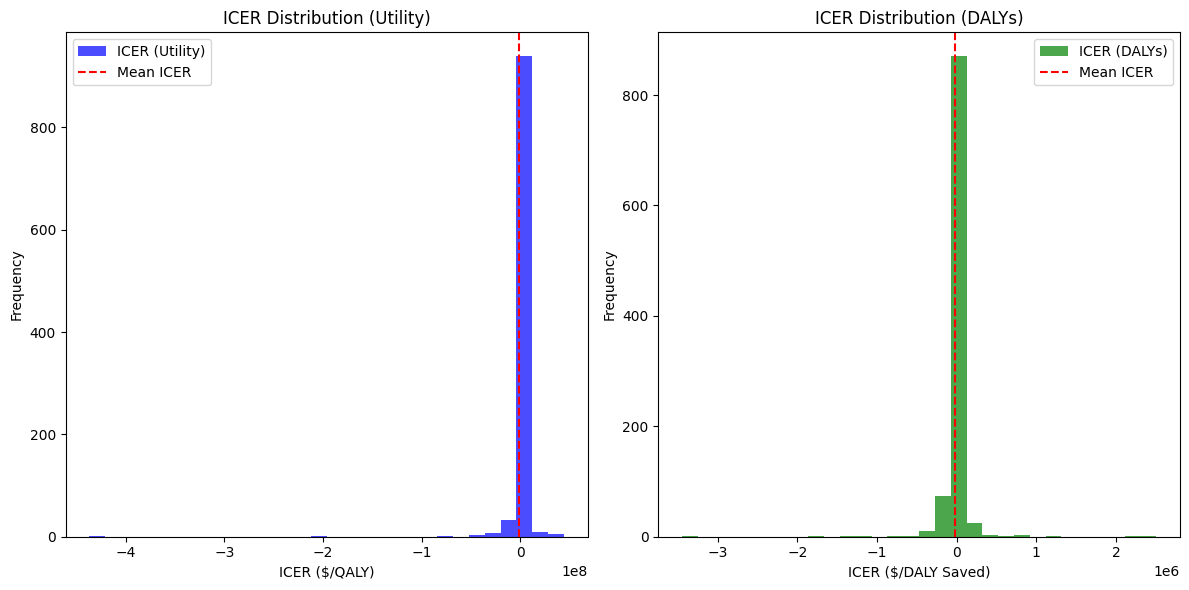

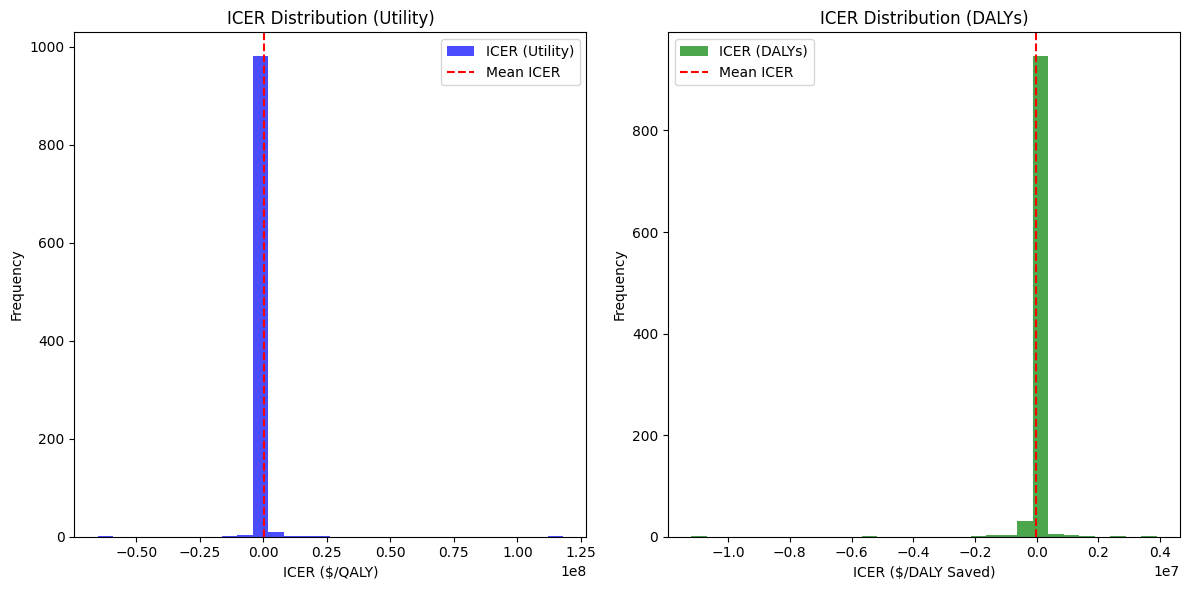

In [379]:

# Visualize results
visualize_psa_results(icers_deaths, icers_ward_days)
visualize_psa_results( icers_icu_days, icers_hospital_days)


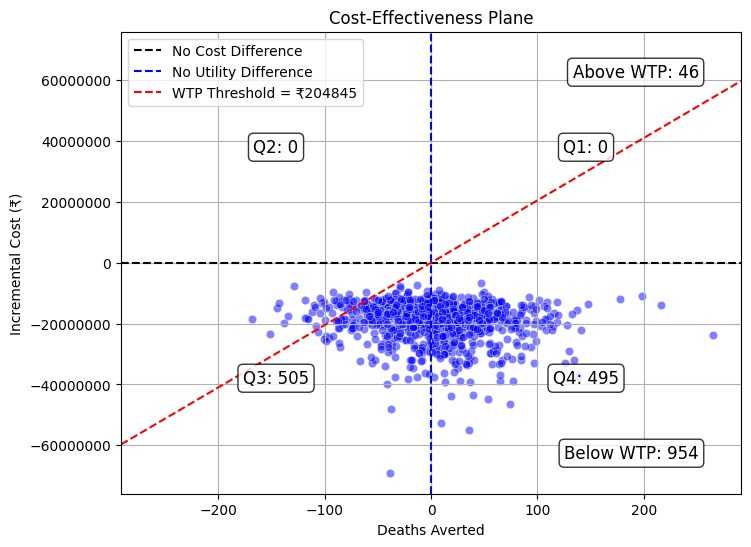

In [389]:

# Cost-Effectiveness Plane
plot_cost_effectiveness_plane(incremental_costs, deaths_averted, 204845, "Deaths Averted")

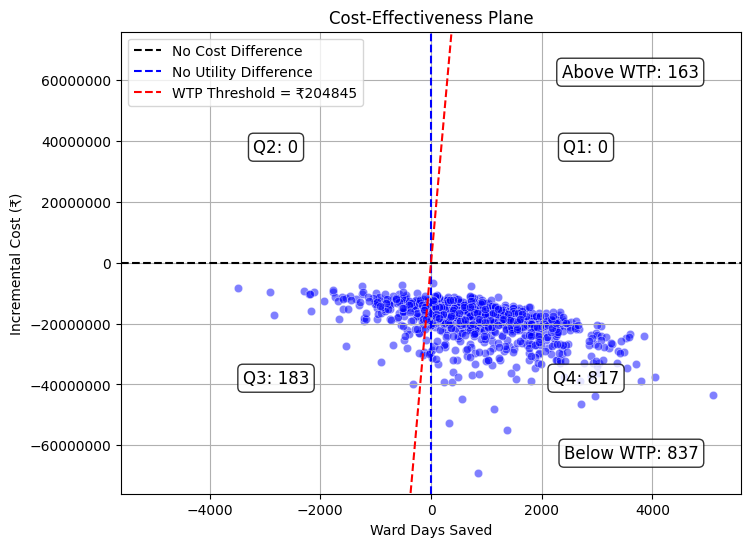

In [390]:
# Cost-Effectiveness Plane
plot_cost_effectiveness_plane(incremental_costs, ward_days_saved, 204845, "Ward Days Saved")

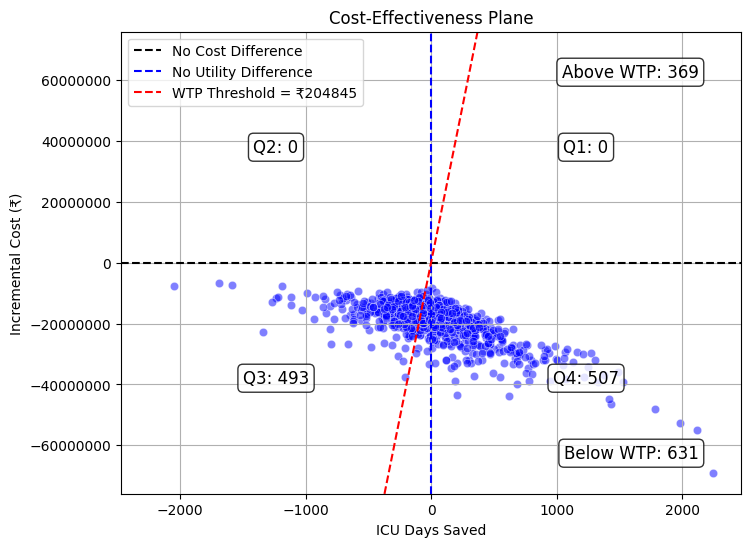

In [391]:
# Cost-Effectiveness Plane
plot_cost_effectiveness_plane(incremental_costs, icu_days_saved, 204845, "ICU Days Saved")

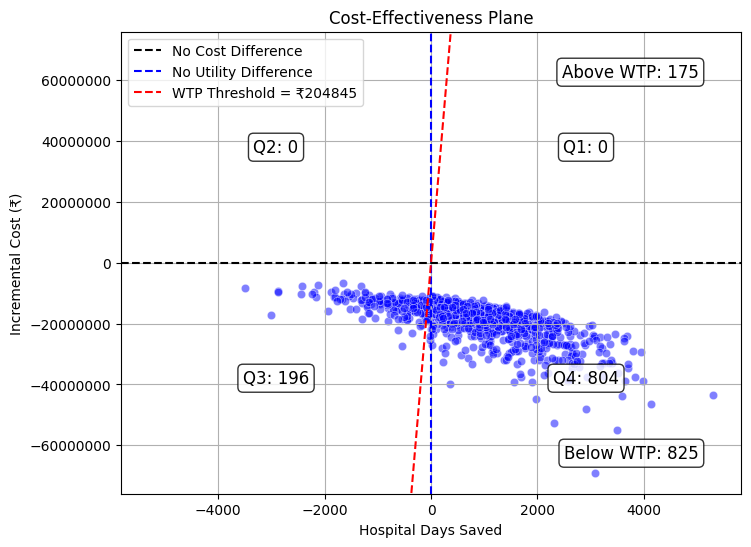

In [392]:
# Cost-Effectiveness Plane
plot_cost_effectiveness_plane(incremental_costs, hospital_days_saved, 204845, "Hospital Days Saved")